In [1]:
import gudhi.simplex_tree
import numpy as np

from itertools import combinations
from gudhi import AlphaComplex

In [2]:
def generate_new_points(count: int):
    x = np.random.random(count)
    y = np.random.random(count)
    return list(zip(x, y))

In [3]:
def print_simplex_tree(simplex_tree: gudhi.simplex_tree.SimplexTree):
    ('Alpha complex is of dimension ', simplex_tree.dimension(), ' - ',
     simplex_tree.num_simplices(), ' simplices - ', simplex_tree.num_vertices(), ' vertices.')
    fmt = '%s -> %.2f'
    for filtered_value in simplex_tree.get_filtration():
        print(fmt % tuple(filtered_value))

In [4]:
def get_boundary_matrix(filtration) -> np.ndarray:
    element_index = dict()
    boundary_matrix = np.zeros([len(filtration), len(filtration)], dtype=np.int8)
    for i, (borders, _) in enumerate(filtration):
        element_index[tuple(borders)] = i
        comp = list(combinations(borders, len(borders)-1))
        
        for combination in comp:
            combination = tuple(combination)
            if combination not in element_index:
                continue
            else:
                index = element_index[combination]
                boundary_matrix[index, i] = 1
    
    return boundary_matrix

In [5]:
def find_lowest_nonzero_in_column(boundary_matrix, col):
    # Extract the column
    column = boundary_matrix[:, col]
    
    # Find the indices of non-zero entries
    non_zero_indices = np.nonzero(column)[0]
    
    if len(non_zero_indices) == 0:
        return None  # If no non-zero entries, return None
    else:
        return np.max(non_zero_indices)

In [6]:
points = generate_new_points(5)
alpha_complex: gudhi.alpha_complex = AlphaComplex(points=points)
tree: gudhi.simplex_tree.SimplexTree = alpha_complex.create_simplex_tree()

In [7]:
print_simplex_tree(tree)

[0] -> 0.00
[1] -> 0.00
[2] -> 0.00
[3] -> 0.00
[4] -> 0.00
[0, 1] -> 0.01
[0, 4] -> 0.02
[3, 4] -> 0.07
[1, 2] -> 0.07
[0, 2] -> 0.09
[0, 1, 2] -> 0.09
[2, 3] -> 0.10
[0, 3] -> 0.13
[0, 3, 4] -> 0.13
[0, 2, 3] -> 0.14


In [8]:
print(tree.persistence())

[(1, (0.09711202822707314, 0.13669817691629899)), (0, (0.0, inf)), (0, (0.0, 0.07325960895891499)), (0, (0.0, 0.07045820396603997)), (0, (0.0, 0.021499646995236148)), (0, (0.0, 0.010699181312155262))]


In [35]:
filtration = list(tree.get_filtration())
boundary_matrix = get_boundary_matrix(filtration)
persistence = [(0, (0, np.inf))]

prev_lowest = dict()
# column reduction
for i in range(boundary_matrix.shape[0]):
    lowest = find_lowest_nonzero_in_column(boundary_matrix, i)
    if lowest is None:
        continue
    while lowest in prev_lowest:
        boundary_matrix[:, i] ^= boundary_matrix[:, prev_lowest[int(lowest)]]
        lowest = find_lowest_nonzero_in_column(boundary_matrix, i)
        if lowest is None:
            break
    prev_lowest[lowest] = i

# read the result
for i in range(boundary_matrix.shape[0]):
    lowest = find_lowest_nonzero_in_column(boundary_matrix, i)
    if lowest is None:
        continue
    dim = len(filtration[i][0]) - 2
    start = filtration[lowest][1]
    end = filtration[i][1]
    if start != end:
        persistence.append((dim , (filtration[lowest][1], filtration[i][1])))
persistence.sort(key=lambda x: (x[0], -x[1][0], -x[1][1]))

In [36]:
persistence

[(0, (0, inf)),
 (0, (0.0, 0.07325960895891499)),
 (0, (0.0, 0.07045820396603997)),
 (0, (0.0, 0.021499646995236148)),
 (0, (0.0, 0.010699181312155262)),
 (1, (0.09711202822707314, 0.13669817691629899))]

<Axes: title={'center': 'Persistence barcode'}>

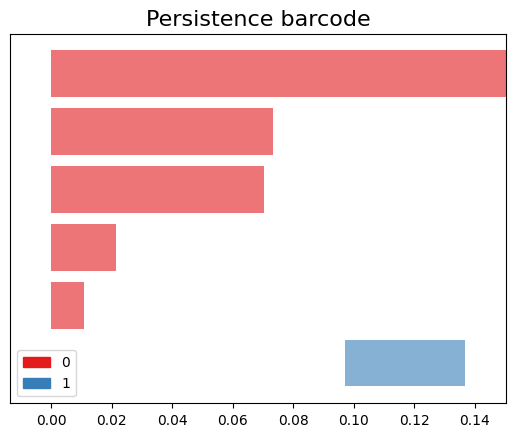

In [37]:
gudhi.plot_persistence_barcode(persistence)

<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

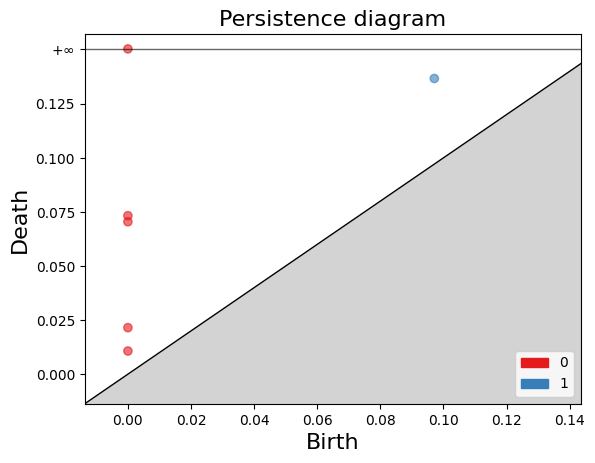

In [38]:
gudhi.plot_persistence_diagram(persistence)

<Axes: title={'center': 'Persistence barcode'}>

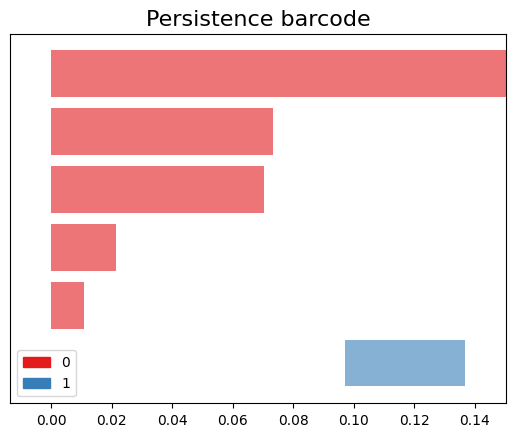

In [25]:
tree.compute_persistence()
gudhi.plot_persistence_barcode(tree.persistence())

<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

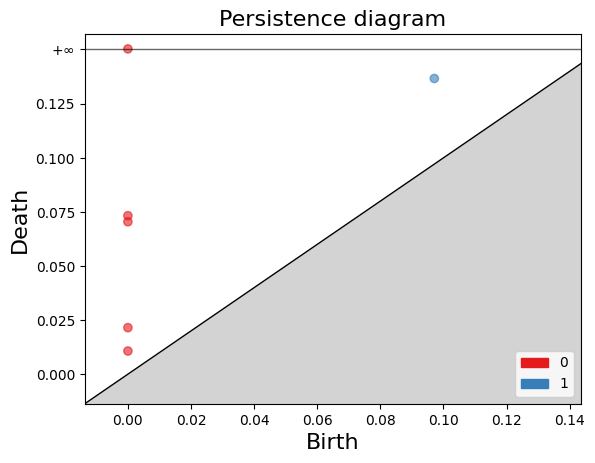

In [39]:
gudhi.plot_persistence_diagram(tree.persistence())


In [101]:
1 ^ 1

0